In [ ]:
!pip install selenium
!pip install pdfrw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
import librosa
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Audio
import soundfile as sf
from numpy import pi
from scipy.fftpack import fft, fftfreq

#only for google drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
import os

try:
    path = "/content/drive/Shareddrives/Data Set Breath IA"
    os.chdir(path)

#add my google drive
except:
    path = "/content/drive/MyDrive/Data Set Breath IA/"
    os.chdir(path)

!ls

Mounted at /content/drive
'BreathIA Pruebas'  'metodologia auscultacion.pdf'   NO_SMOKERS   SMOKERS


In [ ]:

import pdfrw
pdf = pdfrw.PdfReader('/content/Jesus.pdf')
new_pdf = pdfrw.PdfWriter()
print(pdf)
for page in pdf.pages:
    # Check if the page has any hyperlinks
    for annot in page.Annots or []:
        print(annot.A.URI)


ModuleNotFoundError: No module named 'pdfrw'

In [ ]:
print(page.Annots[0].A.URI)

(https://app.ekodevices.com/recording/77befbb5-f79b-4673-99fe-8ac77474f47b)


# New Section

##Descarga audio.waw


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

#configuración del navegador

driver = webdriver.Firefox()
driver.get("http://www.python.org")
assert "Python" in driver.title
elem = driver.find_element(By.NAME, "q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
assert "No results found." not in driver.page_source
driver.close()



for url in urls:
    print(url)
    # Configurar el navegador Chrome y abrir la URL
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=opts)
    driver.get(url)
    # Encontrar y hacer clic en un botón específico en la página web
    button = driver.find_element(By.XPATH, '//button[@class="chakra-button css-16qccfi"]')
    button.click()
    # Esperar 2 segundos antes de continuar con la siguiente URL
    time.sleep(2)

WebDriverException: Message: Process unexpectedly closed with status 1


##Procesamiento de Audio

In [ ]:
print ("subir archivo de audio contenido en la carpeta entregada")
audio = "/content/drive/Shareddrives/Data Set Breath IA/SMOKERS/Katherine.wav"
y,sr = librosa.load(audio) #Se define el audio como una señal de onda y sr referente al sample rate

subir archivo de audio contenido en la carpeta entregada


In [ ]:
Audio(y, rate=sr)
print(Audio(y,rate=sr))

<IPython.lib.display.Audio object>


In [ ]:
#Estudie cada uno de los parámetros del objeto creado para leer el archivo de audio.
F= sr #sample rate o frecuencia del audio
dt = y.size / sr  #
T = 1 / sr #Periodo
t = np.r_[0:dt:T]
print(
    f'y[t] tiene {y.size} muestras', #Cantidad de muestras en el audio
    f'la frecuencia de muestreo es {sr} Hz',
    f'y(t) tiene {dt:.1f}s '#duracion
    , sep='\n')

y[t] tiene 1029824 muestras
la frecuencia de muestreo es 22050 Hz
y(t) tiene 46.7s 


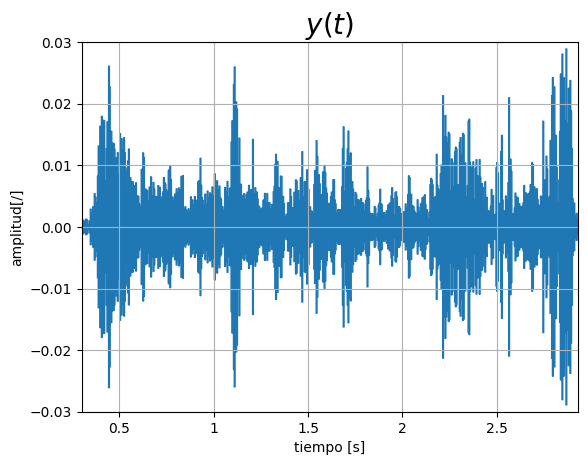

In [ ]:
y, sr = librosa.load(audio)
plt.figure()
plt.subplot()
plt.grid()
plt.xlim(0.3,2.93)
plt.ylim(-0.03,0.03 )
librosa.display.waveshow(y, sr=sr)
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud[/]')
plt.title(r'$y(t)$', size=20);

Audio(y, rate=sr)


##Transformada de Fourier

In [ ]:
Y=fft(y)/y.size
timestep=0.0001
frq = np.fft.fftfreq(y.size,dt)

In [ ]:
print(Y)

[ 1.08392149e-07-0.00000000e+00j  3.53317138e-08+2.34264945e-08j
  2.59539390e-08-1.66297001e-08j ... -5.51955745e-08+3.88473935e-08j
  2.59539390e-08+1.66297001e-08j  3.53317138e-08-2.34264945e-08j]


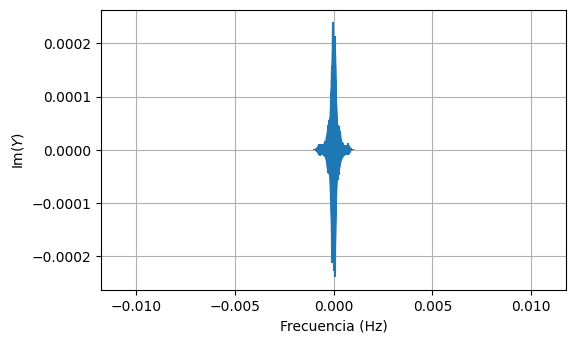

In [ ]:
fig = plt.figure(figsize=(6, 8))

ax = fig.add_subplot(212)
ax.vlines(frq, 0, Y.imag)


#plt.xlim(20,20000)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Im($Y$)')

ax.grid()


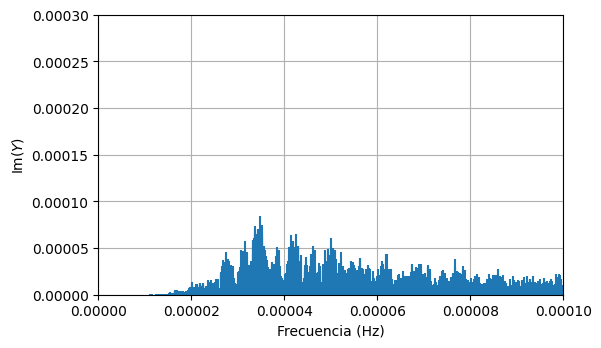

In [ ]:
#Con filtro

yf = y * np.blackman(y.size)

Yf=fft(yf)/y.size
timestep=0.0001
frqf = np.fft.fftfreq(y.size,dt)


fig = plt.figure(figsize=(6, 8))#Con filtro


ax2 = fig.add_subplot(212)
ax2.vlines(frqf, 0, Yf.imag)

plt.xlim(0,0.0001)
plt.ylim(0,0.0003)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Im($Y$)')



ax2.grid()

Text(0, 0.5, 'Frecuencia (Hz)')

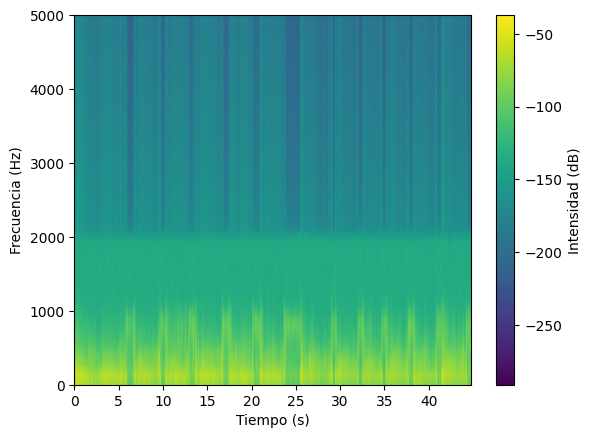

In [ ]:
Pxx, freqs, bins, im = plt.specgram(y, NFFT=256, Fs=sr)
plt.xlim(0, len(y) / sr)
plt.ylim(0, 5000)
plt.colorbar(im).set_label(u'Intensidad (dB)')
plt.xlabel(u'Tiempo (s)')
plt.ylabel(u'Frecuencia (Hz)')